In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['font.size'] = 22
import numpy as np
import pandas as pd
from itertools import combinations
from math import ceil

In [13]:
df = pd.read_csv('data/adult.data', header=None)
df[df == ' ?'] = np.nan
df.isnull().any()

/home/nicolas/.local/share/virtualenvs/academy-ai-python-intro-3RQMJkFU/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0     False
1      True
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
dtype: bool

In [14]:
for col in df.columns:
    if isinstance(df[col][0], np.number):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode().values[0])

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
numericals = df.select_dtypes(np.number)
numericals.columns

Int64Index([0, 2, 4, 10, 11, 12], dtype='int64')

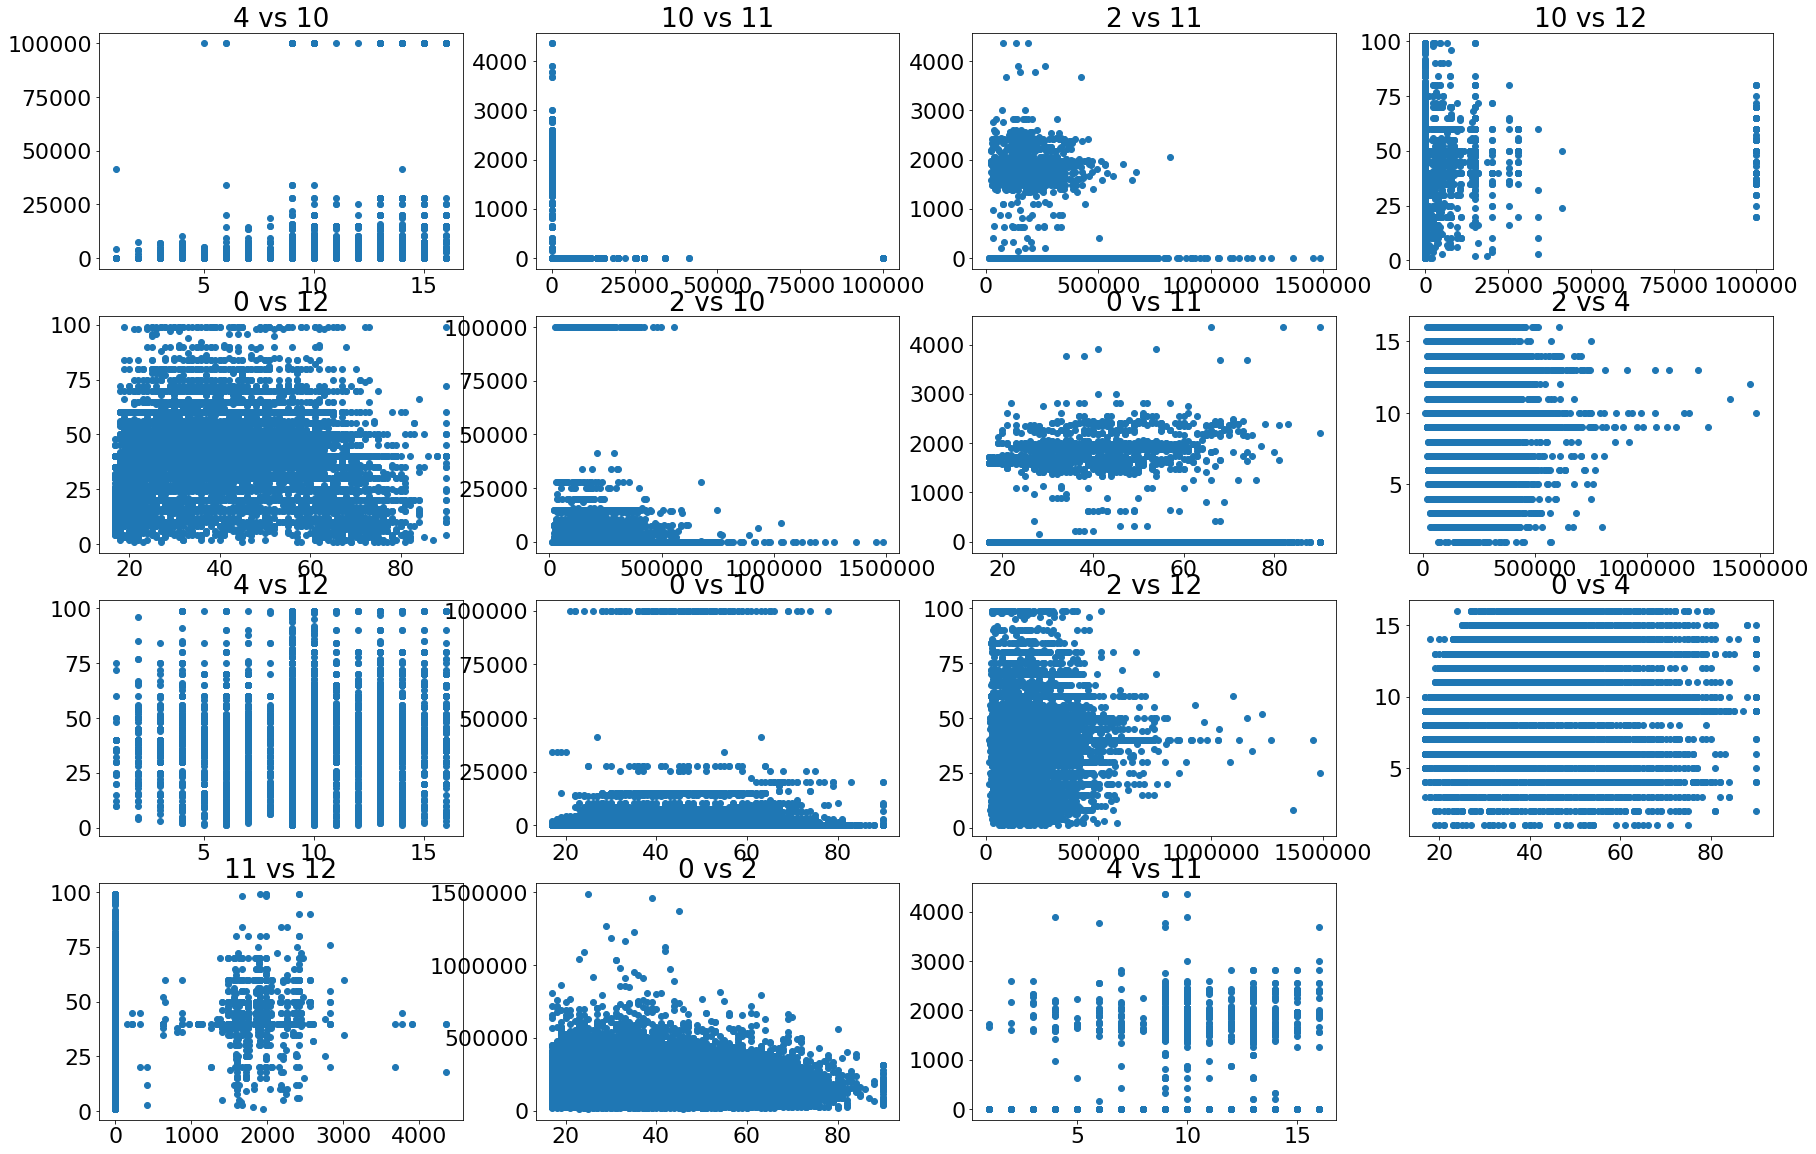

In [17]:
fig = plt.figure()

pairs = set(combinations(numericals.columns, 2))
n_rows = ceil(np.sqrt(len(pairs)))
for i, pair in enumerate(pairs):
    ax = fig.add_subplot(n_rows, n_rows, i + 1)
    ax.set_title(' vs '.join([str(e) for e in pair]))
    plt.scatter(numericals[pair[0]], numericals[pair[1]])

In [18]:
X = df.drop(14, axis=1)
y = df[14]

In [19]:
X = pd.get_dummies(X)

In [20]:
X = (X - X.min()) / (X.max() - X.min())
X.head()

,0,2,4,10,11,12,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,...,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print(len(X))
train_X = X.iloc[:int(len(X) * .8)]
train_y = y[train_X.index]
test_X = X.iloc[int(len(X) * .8):]
test_y = y[test_X.index]
print(len(train_X), len(test_X), len(train_X) + len(test_X))

32561
26048 6513 32561


In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000).fit(train_X, train_y)
clf.score(test_X, test_y)

0.855366190695532